In [1]:
%cd ..

/home/ubuntu/dev/edge/py-edge-eval


Testing kill internal

In [2]:
import os.path as osp

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

from skimage.io import imread

In [4]:
from pyEdgeEval.sbd.utils import load_instance_insensitive_gt

In [6]:
# data for testing
DATA_ROOT = "data/SBD_bench"
SAMPLE_NAME = "2008_000051"

cls_mat_file = osp.join(DATA_ROOT, 'datadir', 'cls', f"{SAMPLE_NAME}.mat")
pred_file = osp.join(DATA_ROOT, 'indir', f"{SAMPLE_NAME}.bmp")

assert osp.exists(cls_mat_file)
assert osp.exists(pred_file)

In [10]:
category = 15  # human

gt, seg, _ = load_instance_insensitive_gt(cls_mat_file)
pred = (imread(pred_file) / 255).astype(float)

cat_gt = gt[category - 1, :, :]
seg = seg == category

In [27]:
thresh = 0.44
tpred =  pred > thresh

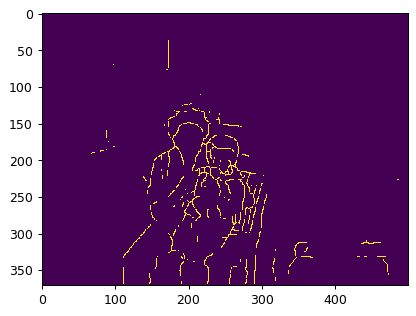

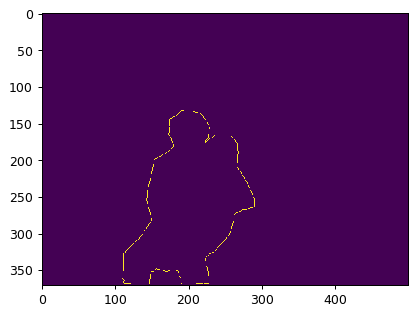

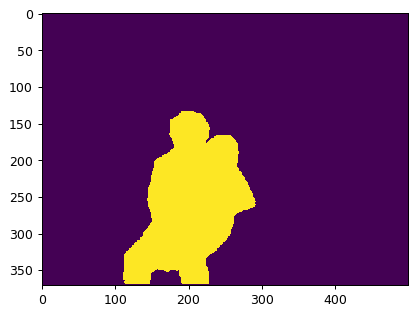

In [33]:
plt.imshow(tpred, interpolation='nearest')
plt.gcf().set_dpi(90)
plt.show()

plt.imshow(cat_gt, interpolation='nearest')
plt.gcf().set_dpi(90)
plt.show()

plt.imshow(seg, interpolation='nearest')
plt.gcf().set_dpi(90)
plt.show()

In [35]:
# Kill Internal

# imports
from scipy.ndimage import distance_transform_edt

# params
max_dist = 0.02

In [36]:
diag = np.sqrt(pred.shape[0] ** 2 + pred.shape[1] ** 2)
buffer = diag * max_dist

print(diag, buffer)

622.608223524232 12.452164470484641


In [37]:
distmap = distance_transform_edt(1 - cat_gt)

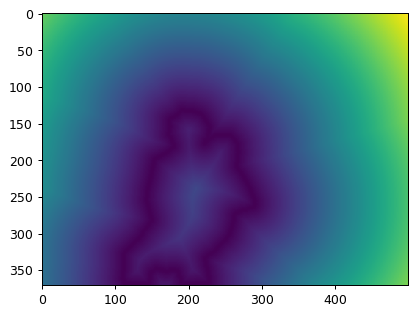

In [38]:
plt.imshow(distmap, interpolation='nearest')
plt.gcf().set_dpi(90)
plt.show()

In [46]:
killmask = np.invert((distmap > buffer) * seg)

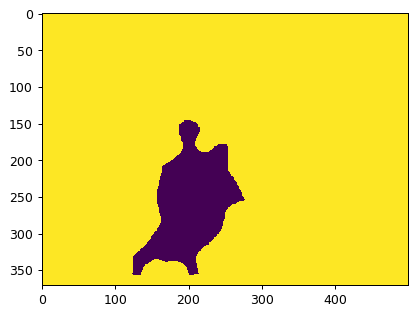

In [47]:
plt.imshow(killmask, interpolation='nearest')
plt.gcf().set_dpi(90)
plt.show()

In [50]:
new_pred = tpred * killmask

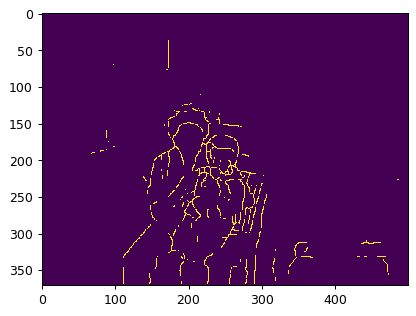

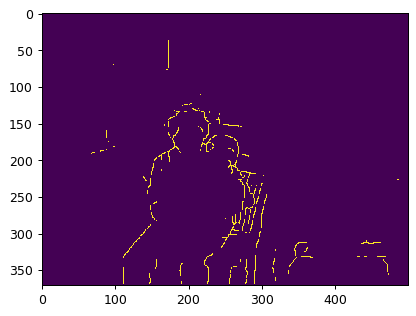

In [52]:
plt.imshow(tpred, interpolation='nearest')
plt.gcf().set_dpi(90)
plt.show()

plt.imshow(new_pred, interpolation='nearest')
plt.gcf().set_dpi(90)
plt.show()